In [45]:
import pyaudio
import torch
import torchaudio
import requests
import pathlib
import wave
# Plot waveform and spectrogram
import matplotlib.pyplot as plt
import os
import librosa
import sklearn
import librosa.display
import numpy as np
from pydub import AudioSegment
from IPython.display import Audio, display

os.environ['KMP_DUPLICATE_LIB_OK']='True'

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 4
WAVE_OUTPUT_FILENAME = "Input.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording (You have 4 Seconds)")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

* recording (You have 4 Seconds)
* done recording


(63902,) 16000
(125,)
[(0.0, 0.9998693817067275), (0.023219954648526078, 0.9967801257446207), (0.046439909297052155, 1.0), (0.06965986394557823, 0.5619779863613714), (0.09287981859410431, 0.39167558214322834), (0.11609977324263039, 0.46440011963757316), (0.13931972789115646, 0.5922510526875473), (0.16253968253968254, 0.5623166616289075), (0.18575963718820862, 0.5684335946978376), (0.2089795918367347, 0.5836918507436664), (0.23219954648526078, 0.566191574765825), (0.25541950113378686, 0.6245004906834299), (0.2786394557823129, 0.6914204260342642), (0.301859410430839, 0.7329202066691709), (0.3250793650793651, 0.7168760543672907), (0.34829931972789113, 0.729141593418891), (0.37151927437641724, 0.7212126350159958), (0.3947392290249433, 0.7128453239892047), (0.4179591836734694, 0.8246750235864444), (0.44117913832199546, 0.5218099808624559), (0.46439909297052157, 0.4165987842919168), (0.4876190476190476, 0.3687085289865773), (0.5108390022675737, 0.40847930007002814), (0.5340589569160997, 0.44

C:\Users\azriel\AppData\Local\Temp\ipykernel_19368\1083758439.py:33: FutureWarning: Pass y=[-2.2613578e-05 -4.8760947e-05  3.0766844e-06 ...  1.6246278e-04
  5.0184218e-04  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(waveform_data, sr=sample_rate)[0]


(30,)


C:\Users\azriel\AppData\Local\Temp\ipykernel_19368\1083758439.py:33: FutureWarning: Pass y=[ 8.6449281e-06 -7.9863283e-05  1.4546719e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(waveform_data, sr=sample_rate)[0]


[(0.0, 0.7425805010636172), (0.023219954648526078, 0.23974723066285902), (0.046439909297052155, 0.2632479829949864), (0.06965986394557823, 0.3240042856162912), (0.09287981859410431, 0.34036793029776513), (0.11609977324263039, 0.2975023747431717), (0.13931972789115646, 0.20409728160726964), (0.16253968253968254, 0.09081159667688087), (0.18575963718820862, 0.4513566450644116), (0.2089795918367347, 0.1804951558799352), (0.23219954648526078, 0.0916053122375025), (0.25541950113378686, 0.08709756397180592), (0.2786394557823129, 0.09446326164679138), (0.301859410430839, 0.11257930328482592), (0.3250793650793651, 0.13677095038689724), (0.34829931972789113, 0.19085532039714126), (0.37151927437641724, 0.24174730469104944), (0.3947392290249433, 0.25055642292540325), (0.4179591836734694, 0.2220252007397972), (0.44117913832199546, 0.17275332436971658), (0.46439909297052157, 0.1361202809421651), (0.4876190476190476, 0.04866641360640901), (0.5108390022675737, 0.0), (0.5340589569160997, 0.118595774546

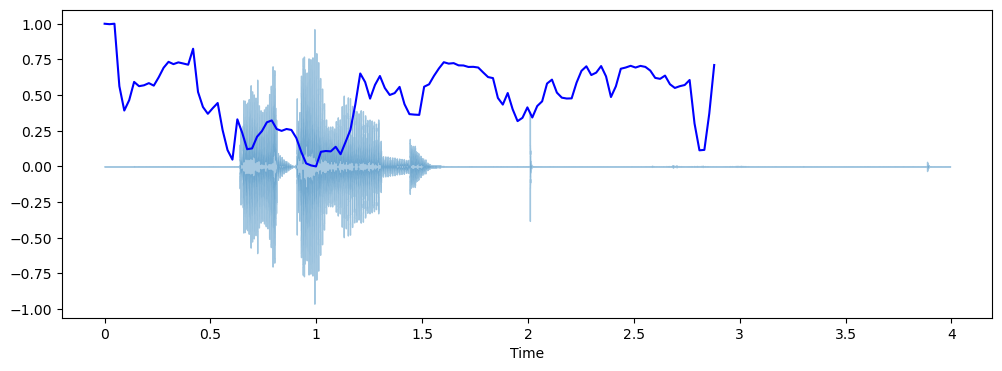

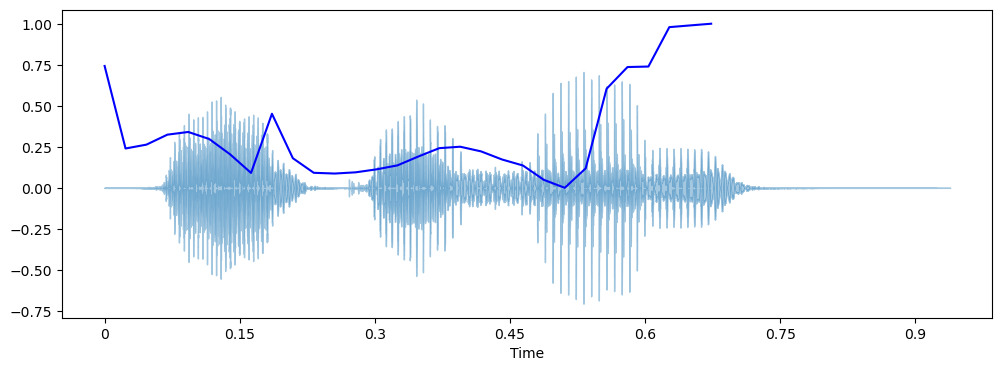

In [44]:
# -------------------------------------------------------------------------------
def _plot(waveform, sample_rate, title):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    if title == "Waveform":
      axes[c].plot(time_axis, waveform[c], linewidth=1)
      axes[c].grid(True)
    else:
      axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
  figure.suptitle(title)
  plt.show(block=False)

def plot_waveform(waveform, sample_rate, title):
  _plot(waveform, sample_rate, title + "Waveform")

def plot_specgram(waveform, sample_rate, title):
  _plot(waveform, sample_rate, title + "Spectrogram")
  
# Normalising the spectral centroid for visualization
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

def get_spectral_centroid(waveform_data, sample_rate):
  spectral_centroids = librosa.feature.spectral_centroid(waveform_data, sr=sample_rate)[0]
  print(spectral_centroids.shape)
  plt.figure(figsize=(12,4))
  frames = range(len(spectral_centroids))
  t = librosa.frames_to_time(frames)
  
  # Plotting the Spectral centroid along the waveform
  librosa.display.waveshow(waveform_data, sr=sample_rate, alpha=0.4)
  plt.plot(t, normalize(spectral_centroids), color='b')
  SpecCentroid = list(zip(t,normalize(spectral_centroids)))
  print(list(zip(t,normalize(spectral_centroids))))
  print(sum(1 for x,y in SpecCentroid if x == y) / len(t))
  
# waveform, sample_rate = torchaudio.load("InputAbraham.wav")
# metadata = torchaudio.info("InputAbraham.wav")

audio = AudioSegment.from_wav("InputAbraham.wav")
audio = audio + 15
audio.export("BoostedAbraham.wav", format="wav")
display(Audio("BoostedAbraham.wav"))

waveform, sample_rate = librosa.load("BoostedAbraham.wav", sr=16000)

# from IPython.display import Audio, display
# display(Audio("BoostedAbraham.wav"))


print(waveform.shape, sample_rate)
# print(metadata)  
# plot_waveform(waveform, sample_rate, "Input Abraham")
# plot_specgram(waveform, sample_rate, "Input Abraham")

get_spectral_centroid(waveform, sample_rate)




# waveform, sample_rate = torchaudio.load("Abraham.wav")
# metadata = torchaudio.info("Abraham.wav")

waveform, sample_rate = librosa.load("Abraham.wav", sr=16000)

from IPython.display import Audio, display
display(Audio("Abraham.wav"))

# print(waveform.shape, sample_rate)

# print(metadata)  
# plot_waveform(waveform, sample_rate, "Base Abraham")
# plot_specgram(waveform, sample_rate, "Base Abraham")

get_spectral_centroid(waveform, sample_rate)

# librosa.load("Abraham.wav", sr=16000)

(63902,) 16000
[-2.2613578e-05 -4.8760947e-05  3.0766844e-06 ...  1.6246278e-04
  5.0184218e-04  0.0000000e+00]
(63902,) 16000
[-3.8150970e-06 -8.0636073e-06  4.2944791e-07 ...  3.1366133e-05
  9.3378469e-05  0.0000000e+00]
63902
56697
[ 8.5930864e-05  1.8385000e-04  1.4148833e-04 ... -9.3797762e-03
 -1.0040366e-02 -1.0191110e-02]
[-3.8150970e-06 -8.0636073e-06  4.2944791e-07 ...  3.1366133e-05
  9.3378469e-05  0.0000000e+00]


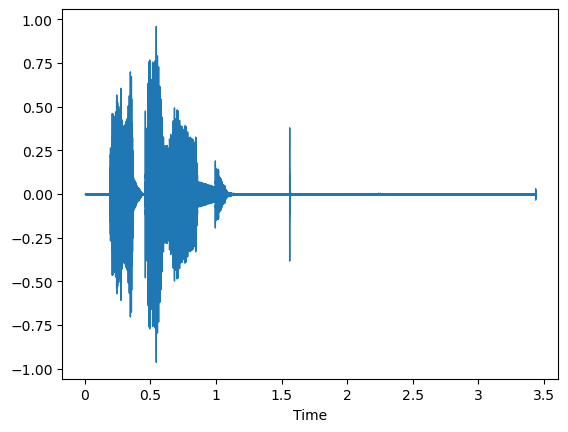

In [57]:
# -------------------------------------------------------------------------------
def _plot(waveform, sample_rate, title):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  time_axis = torch.arange(0, num_frames) / sample_rate

  figure, axes = plt.subplots(num_channels, 1)
  if num_channels == 1:
    axes = [axes]
  for c in range(num_channels):
    if title == "Waveform":
      axes[c].plot(time_axis, waveform[c], linewidth=1)
      axes[c].grid(True)
    else:
      axes[c].specgram(waveform[c], Fs=sample_rate)
    if num_channels > 1:
      axes[c].set_ylabel(f'Channel {c+1}')
  figure.suptitle(title)
  plt.show(block=False)

def plot_waveform(waveform, sample_rate, title):
  _plot(waveform, sample_rate, title + "Waveform")

def plot_specgram(waveform, sample_rate, title):
  _plot(waveform, sample_rate, title + "Spectrogram")
  
# Normalising the spectral centroid for visualization
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

def get_spectral_centroid(waveform_data, sample_rate):
  spectral_centroids = librosa.feature.spectral_centroid(waveform_data, sr=sample_rate)[0]
  print(spectral_centroids.shape)
  plt.figure(figsize=(12,4))
  frames = range(len(spectral_centroids))
  t = librosa.frames_to_time(frames)
  
  # Plotting the Spectral centroid along the waveform
  librosa.display.waveshow(waveform_data, sr=sample_rate, alpha=0.4)
  plt.plot(t, normalize(spectral_centroids), color='b')
  SpecCentroid = list(zip(t,normalize(spectral_centroids)))
  print(list(zip(t,normalize(spectral_centroids))))
  print(sum(1 for x,y in SpecCentroid if x == y) / len(t))
  
# waveform, sample_rate = torchaudio.load("InputAbraham.wav")
# metadata = torchaudio.info("InputAbraham.wav")

audio = AudioSegment.from_wav("InputAbraham.wav")
audio = audio + 15
audio.export("BoostedAbraham.wav", format="wav")
display(Audio("BoostedAbraham.wav"))

waveform, sample_rate = librosa.load("BoostedAbraham.wav", sr=16000)

# from IPython.display import Audio, display
# display(Audio("BoostedAbraham.wav"))


print(waveform.shape, sample_rate)
# print(metadata)  
# plot_waveform(waveform, sample_rate, "Input Abraham")
# plot_specgram(waveform, sample_rate, "Input Abraham")

# get_spectral_centroid(waveform, sample_rate)


print(waveform)


waveform2, sample_rate = librosa.load("InputAbraham.wav", sr=16000)

# from IPython.display import Audio, display
# display(Audio("BoostedAbraham.wav"))


print(waveform2.shape, sample_rate)
# print(metadata)  
# plot_waveform(waveform, sample_rate, "Input Abraham")
# plot_specgram(waveform, sample_rate, "Input Abraham")

# get_spectral_centroid(waveform, sample_rate)


print(waveform2)

print(len(waveform))


# Attempt to try to trim static noise before and after the input waveform

for i in range(len(waveform)):
    if abs(waveform[i]) > 0.01:
        # Give some leeway
        i -= 3000
#         time = (4/i)
#         song = AudioSegment.from_wav("InputAbraham.wav")
#         first_10_seconds = song[:ten_seconds]
        waveform = waveform[i:]
        break
    else:
        continue

print(len(waveform))
        
for i in range(len(waveform)-1, 0, -1):
    if abs(waveform[i]) > 0.01:
        # Give some leeway
#         time = (4/i)
#         song = AudioSegment.from_wav("InputAbraham.wav")
#         first_10_seconds = song[:ten_seconds]
        waveform = waveform[:i]
        break
    else:
        continue

        
print(waveform)
print(waveform2)
librosa.display.waveshow(waveform, sr=sample_rate)

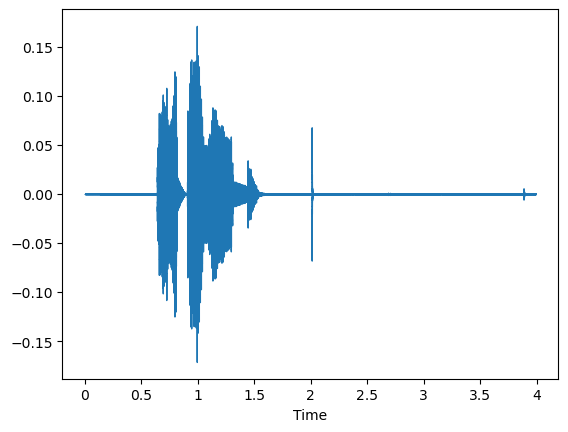

In [58]:
waveform, sample_rate = librosa.load("InputAbraham.wav", sr=16000)

# from IPython.display import Audio, display
# display(Audio("BoostedAbraham.wav"))


# print(waveform2.shape, sample_rate)
# print(metadata)  
# plot_waveform(waveform, sample_rate, "Input Abraham")

librosa.display.waveshow(waveform, sr=sample_rate)

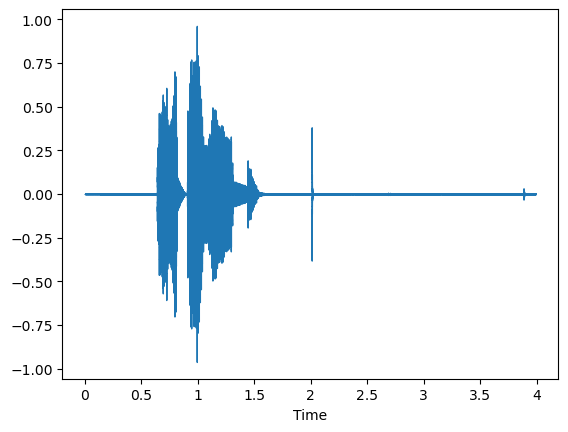

In [59]:
waveform, sample_rate = librosa.load("BoostedAbraham.wav", sr=16000)

# from IPython.display import Audio, display
# display(Audio("BoostedAbraham.wav"))


# print(waveform2.shape, sample_rate)
# print(metadata)  
# plot_waveform(waveform, sample_rate, "Input Abraham")

librosa.display.waveshow(waveform, sr=sample_rate)

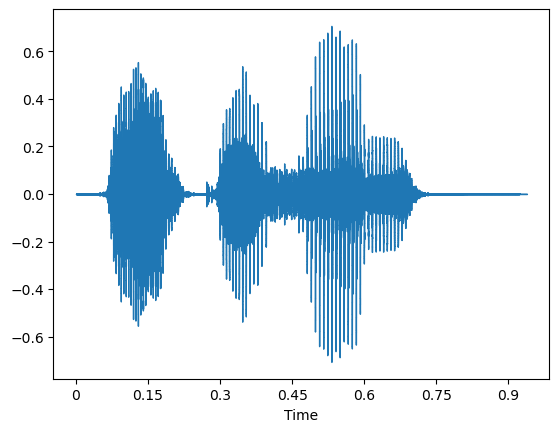

In [60]:
waveform, sample_rate = librosa.load("Abraham.wav", sr=16000)

# from IPython.display import Audio, display
# display(Audio("BoostedAbraham.wav"))


# print(waveform2.shape, sample_rate)
# print(metadata)  
# plot_waveform(waveform, sample_rate, "Input Abraham")

librosa.display.waveshow(waveform, sr=sample_rate)